In [70]:
import pandas as pd
!pip install --upgrade keras
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras import regularizers, optimizers
import pandas as pd

Requirement already up-to-date: keras in /home/ubuntu/anaconda3/lib/python3.7/site-packages (2.2.4)


In [71]:

import keras
from keras import backend as K

print('Keras version:',keras.__version__)

Keras version: 2.2.4


In [82]:
import tensorflow as tf
from keras.backend.tensorflow_backend import set_session
config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.3
set_session(tf.Session(config=config))

In [72]:
# Load the dataframe
train_path = "/home/ubuntu/Documents/DataPrep/CNN_v1/CNN_ED_KJ_JY_LM_jpg_DF.csv"
Train_DF = pd.read_csv(train_path, index_col = 0)

In [73]:
Train_DF.columns.tolist()

['JPG_File_Path',
 'Exposure',
 'Contrast',
 'Highlights',
 'Shadows',
 'Temperature']

In [74]:
datagen=ImageDataGenerator(rescale=1./255.,validation_split=0.25)

In [75]:
## Prepare the data
train_iter=datagen.flow_from_dataframe(
dataframe=Train_DF,
directory=None,
x_col="JPG_File_Path",
y_col=['Exposure','Contrast','Highlights','Shadows','Temperature'],
has_ext=False,
subset="training",
class_mode="other",
target_size=(32,32))

Found 1825 validated image filenames.


In [76]:
valid_iter=datagen.flow_from_dataframe(
dataframe=Train_DF,
directory=None,
x_col="JPG_File_Path",
y_col=['Exposure','Contrast','Highlights','Shadows','Temperature'],
has_ext=False,
subset="validation",
class_mode="other",
target_size=(32,32))

Found 608 validated image filenames.


In [77]:
## The images has to be jpg
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=(32,32,3)))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

In [78]:
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

In [79]:
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))
model.compile(optimizers.rmsprop(lr=0.0001, decay=1e-6),loss="mse",metrics=["mse"])

In [80]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_25 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_26 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 15, 15, 64)        18496     
__________

In [81]:
STEP_SIZE_TRAIN=train_iter.n//train_iter.batch_size
STEP_SIZE_VALID=valid_iter.n//valid_iter.batch_size
history = model.fit_generator(generator=train_iter,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=valid_iter,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=10
)

Epoch 1/10
57/57 [==============================] - 11s 185ms/step - loss: 4251377.5132 - mean_squared_error: 4251377.5132 - val_loss: 3648199.4079 - val_mean_squared_error: 3648199.4079
Epoch 2/10
57/57 [==============================] - 10s 168ms/step - loss: 4236188.8075 - mean_squared_error: 4236188.8075 - val_loss: 3648199.0132 - val_mean_squared_error: 3648199.0132
Epoch 3/10
57/57 [==============================] - 9s 156ms/step - loss: 4313773.4344 - mean_squared_error: 4313773.4344 - val_loss: 3648199.0395 - val_mean_squared_error: 3648199.0395
Epoch 4/10
57/57 [==============================] - 9s 161ms/step - loss: 4207595.4694 - mean_squared_error: 4207595.4694 - val_loss: 3648199.0658 - val_mean_squared_error: 3648199.0658
Epoch 5/10
57/57 [==============================] - 9s 162ms/step - loss: 4241744.9186 - mean_squared_error: 4241744.9186 - val_loss: 3648199.0395 - val_mean_squared_error: 3648199.0395
Epoch 6/10
57/57 [==============================] - 9s 162ms/step - 

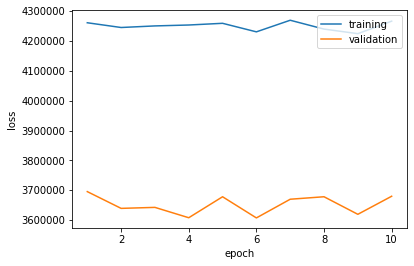

In [47]:
%matplotlib inline
from matplotlib import pyplot as plt

epoch_nums = range(1,10+1)
training_loss = history.history["loss"]
validation_loss = history.history["val_loss"]
plt.plot(epoch_nums, training_loss)
plt.plot(epoch_nums, validation_loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

Try to fit only one label

In [83]:
datagen=ImageDataGenerator(rescale=1./255.,validation_split=0.25)

## Prepare the data
train_iter=datagen.flow_from_dataframe(
dataframe=Train_DF,
directory=None,
x_col="JPG_File_Path",
y_col='Exposure',
has_ext=False,
subset="training",
class_mode="other",
target_size=(32,32))

valid_iter=datagen.flow_from_dataframe(
dataframe=Train_DF,
directory=None,
x_col="JPG_File_Path",
y_col='Exposure',
has_ext=False,
subset="validation",
class_mode="other",
target_size=(32,32))

Found 1825 validated image filenames.
Found 608 validated image filenames.


In [84]:
## The images has to be jpg
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=(32,32,3)))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

In [85]:
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

In [86]:
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='softmax'))
model.compile(optimizers.rmsprop(lr=0.0001, decay=1e-6),loss="mse",metrics=["mse"])

In [87]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_30 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_31 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 15, 15, 64)        18496     
__________

In [ ]:
STEP_SIZE_TRAIN=train_iter.n//train_iter.batch_size
STEP_SIZE_VALID=valid_iter.n//valid_iter.batch_size
history = model.fit_generator(generator=train_iter,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=valid_iter,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=20
)

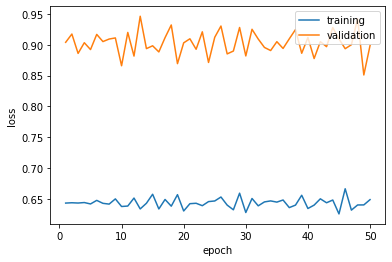

In [68]:
%matplotlib inline
from matplotlib import pyplot as plt

epoch_nums = range(1,50+1)
training_loss = history.history["loss"]
validation_loss = history.history["val_loss"]
plt.plot(epoch_nums, training_loss)
plt.plot(epoch_nums, validation_loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

Now try to use pretrained model + final dense layer

In [90]:
datagen=ImageDataGenerator(rescale=1./255.,validation_split=0.25)

## Prepare the data
train_iter=datagen.flow_from_dataframe(
dataframe=Train_DF,
directory=None,
x_col="JPG_File_Path",
y_col='Exposure',
has_ext=False,
subset="training",
class_mode="other",
target_size=(32,32))

valid_iter=datagen.flow_from_dataframe(
dataframe=Train_DF,
directory=None,
x_col="JPG_File_Path",
y_col='Exposure',
has_ext=False,
subset="validation",
class_mode="other",
target_size=(32,32))

Found 1825 validated image filenames.
Found 608 validated image filenames.


In [91]:
from keras import applications
#Load the base model, not including its final connected layer, and set the input shape to match our images
base_model = keras.applications.vgg16.VGG16(weights='imagenet', include_top=False, input_shape=train_iter.image_shape)

58892288/58889256 [==============================] - 8s 0us/step


In [97]:
## Freeze the trained layers 
from keras import Model
from keras.layers import Flatten, Dense
from keras import optimizers

# Freeze the already-trained layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Create layers for last regression of our images
x = base_model.output
x = Flatten()(x)
prediction_layer = Dense(1, activation='tanh')(x) 
model = Model(inputs=base_model.input, outputs=prediction_layer)

model.compile(optimizers.rmsprop(lr=0.01, decay=1e-6),loss="mse",metrics=["mse"])


In [98]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0         
__________

In [99]:
STEP_SIZE_TRAIN=train_iter.n//train_iter.batch_size
STEP_SIZE_VALID=valid_iter.n//valid_iter.batch_size
history = model.fit_generator(generator=train_iter,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=valid_iter,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=30
)

Epoch 1/30
57/57 [==============================] - 11s 199ms/step - loss: 0.3401 - mean_squared_error: 0.3401 - val_loss: 0.5059 - val_mean_squared_error: 0.5059
Epoch 2/30
57/57 [==============================] - 10s 170ms/step - loss: 0.2922 - mean_squared_error: 0.2922 - val_loss: 0.4009 - val_mean_squared_error: 0.4009
Epoch 3/30
57/57 [==============================] - 10s 170ms/step - loss: 0.2998 - mean_squared_error: 0.2998 - val_loss: 0.4430 - val_mean_squared_error: 0.4430
Epoch 4/30
57/57 [==============================] - 10s 174ms/step - loss: 0.2854 - mean_squared_error: 0.2854 - val_loss: 0.4774 - val_mean_squared_error: 0.4774
Epoch 5/30
57/57 [==============================] - 10s 173ms/step - loss: 0.2717 - mean_squared_error: 0.2717 - val_loss: 0.3876 - val_mean_squared_error: 0.3876
Epoch 6/30
57/57 [==============================] - 10s 175ms/step - loss: 0.2657 - mean_squared_error: 0.2657 - val_loss: 0.3770 - val_mean_squared_error: 0.3770
Epoch 7/30
57/57 [====

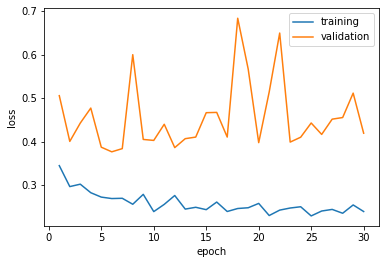

In [100]:
%matplotlib inline
from matplotlib import pyplot as plt

epoch_nums = range(1,30+1)
training_loss = history.history["loss"]
validation_loss = history.history["val_loss"]
plt.plot(epoch_nums, training_loss)
plt.plot(epoch_nums, validation_loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

In [101]:

## To save a model

from keras.models import load_model

modelFileName = 'Eddi_Regression_v1.h5'

model.save(modelFileName) # saves the trained model
print("Model saved.")

Model saved.


In [102]:
# load the saved model
modelFileName = 'Eddi_Regression_v1.h5'
model = load_model(modelFileName) 

In [104]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0         
__________

In [108]:
## Freeze the trained layers 
from keras import Model
from keras.layers import Flatten, Dense
from keras import optimizers

# Freeze the already-trained layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Create layers for last regression of our images
x = base_model.output
x = Flatten()(x)
prediction_layer = Dense(1, activation='softplus')(x) 
model = Model(inputs=base_model.input, outputs=prediction_layer)

model.compile(optimizers.rmsprop(lr=0.05, decay=1e-6),loss="mse",metrics=["mse"])


In [109]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0         
__________

In [110]:
STEP_SIZE_TRAIN=train_iter.n//train_iter.batch_size
STEP_SIZE_VALID=valid_iter.n//valid_iter.batch_size
history = model.fit_generator(generator=train_iter,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=valid_iter,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=20
)

Epoch 1/20
57/57 [==============================] - 11s 199ms/step - loss: 0.4029 - mean_squared_error: 0.4029 - val_loss: 0.4258 - val_mean_squared_error: 0.4258
Epoch 2/20
57/57 [==============================] - 10s 176ms/step - loss: 0.5763 - mean_squared_error: 0.5763 - val_loss: 0.3972 - val_mean_squared_error: 0.3972
Epoch 3/20
57/57 [==============================] - 10s 178ms/step - loss: 0.4022 - mean_squared_error: 0.4022 - val_loss: 0.4056 - val_mean_squared_error: 0.4056
Epoch 4/20
57/57 [==============================] - 10s 175ms/step - loss: 0.3952 - mean_squared_error: 0.3952 - val_loss: 0.4443 - val_mean_squared_error: 0.4443
Epoch 5/20
57/57 [==============================] - 10s 182ms/step - loss: 0.4260 - mean_squared_error: 0.4260 - val_loss: 0.4019 - val_mean_squared_error: 0.4019
Epoch 6/20
57/57 [==============================] - 10s 175ms/step - loss: 0.3971 - mean_squared_error: 0.3971 - val_loss: 0.4105 - val_mean_squared_error: 0.4105
Epoch 7/20
57/57 [====

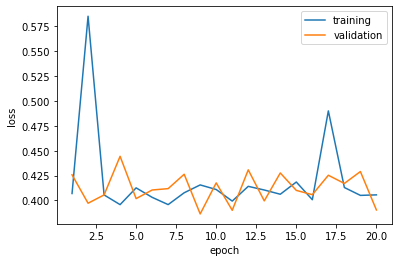

In [123]:
%matplotlib inline
from matplotlib import pyplot as plt

epoch_nums = range(1,20+1)
training_loss = history.history["loss"]
validation_loss = history.history["val_loss"]
plt.plot(epoch_nums, training_loss)
plt.plot(epoch_nums, validation_loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

In [114]:
import tensorflow as tf
from keras.backend.tensorflow_backend import set_session
config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.9
set_session(tf.Session(config=config))

In [115]:
tf.Session()

In [116]:
from tensorflow.python.client import device_lib

device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 16303146013955633541, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 10686856168061023496
 physical_device_desc: "device: XLA_CPU device"]

In [117]:
tf.test.is_gpu_available()

False

In [118]:
tf.test.gpu_device_name()


''

In [119]:
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 17572077164292516871, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 9158890267579451409
 physical_device_desc: "device: XLA_CPU device"]